In [1]:
# pip install pandas textblob openpyxl
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
# Path to the input Excel file
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'

# Read the Excel file using openpyxl engine
excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# Perform sentiment analysis on each sheet
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name in excel_data.sheet_names:
        # Read the sheet into a DataFrame
        df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')

        # Assuming the comments are in a column named 'Reviews'
        # If your column name is different, change it accordingly

        # Ensure all entries in the 'Reviews' column are strings
        df['Reviews'] = df['Reviews'].astype(str)

        # Perform sentiment analysis
        df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
        df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

        # Save the updated DataFrame to a new sheet in the output Excel file
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Sentiment analysis completed and saved to {output_file}")

Sentiment analysis completed and saved to /Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx


In [ ]:
# import pandas as pd
# from textblob import TextBlob
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud

# # Path to the input and output Excel files
# input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
# output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'
# output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'

# # Read the Excel file using openpyxl engine
# excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# # Initialize a list to store high subjective reviews
# high_subjective_reviews = []

# # Perform sentiment analysis on each sheet
# with pd.ExcelWriter(output_sentiment_file, engine='openpyxl') as writer:
#     for sheet_name in excel_data.sheet_names:
#         # Read the sheet into a DataFrame
#         df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')

#         # Ensure all entries in the 'Reviews' column are strings
#         df['Reviews'] = df['Reviews'].astype(str)

#         # Perform sentiment analysis
#         df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
#         df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#         # Save the updated DataFrame to a new sheet in the output Excel file
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

#         # Filter high subjective reviews
#         high_subjective_df = df[df['Subjectivity'] > 0.8].copy()
#         high_subjective_df.loc[:, 'Source'] = sheet_name  # Add a column for the source name
#         high_subjective_reviews.append(high_subjective_df)

# # Concatenate all high subjective reviews into one DataFrame
# high_subjective_reviews_df = pd.concat(high_subjective_reviews, ignore_index=True)

# # Save the high subjective reviews to a new Excel file
# with pd.ExcelWriter(output_high_subjective_file, engine='openpyxl') as writer:
#     high_subjective_reviews_df.to_excel(writer, sheet_name='High_Subjective_Reviews', index=False)

# print(f"Sentiment analysis completed and saved to {output_sentiment_file}")
# print(f"High subjective reviews filtered and saved to {output_high_subjective_file}")


In [3]:
# Load the sentiment analysis results
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'
excel_data = pd.ExcelFile(output_file, engine='openpyxl')

# Initialize a dictionary to store DataFrames for each sheet
data_frames = {}

# Read each sheet into a DataFrame and store in the dictionary
for sheet_name in excel_data.sheet_names:
    data_frames[sheet_name] = pd.read_excel(output_file, sheet_name=sheet_name, engine='openpyxl')

Plotting for sheet: good_reads


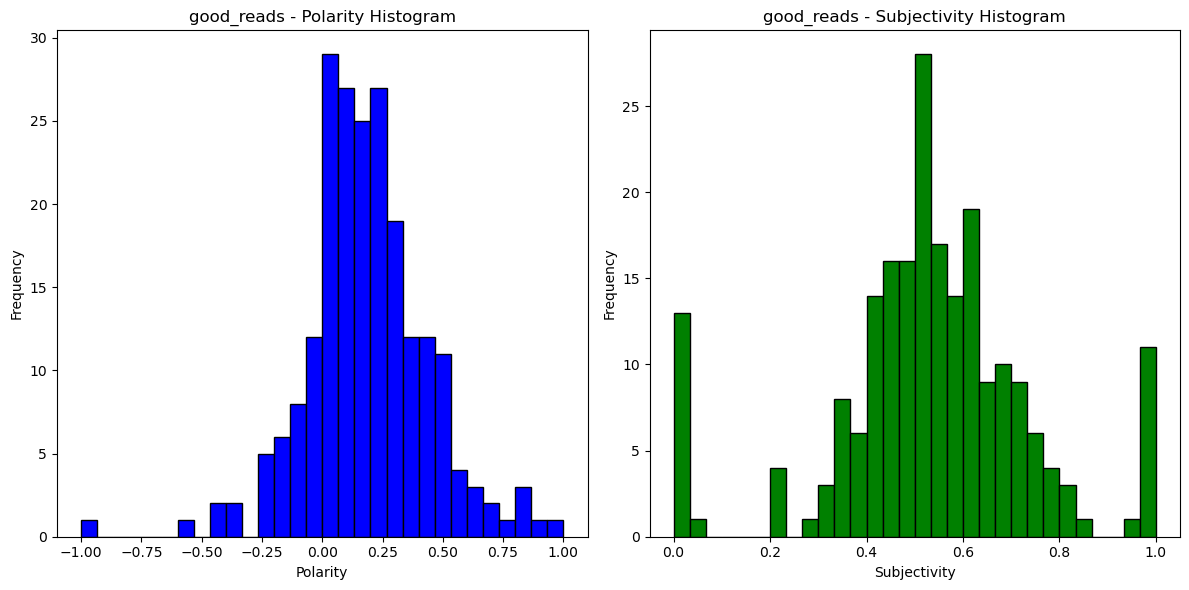

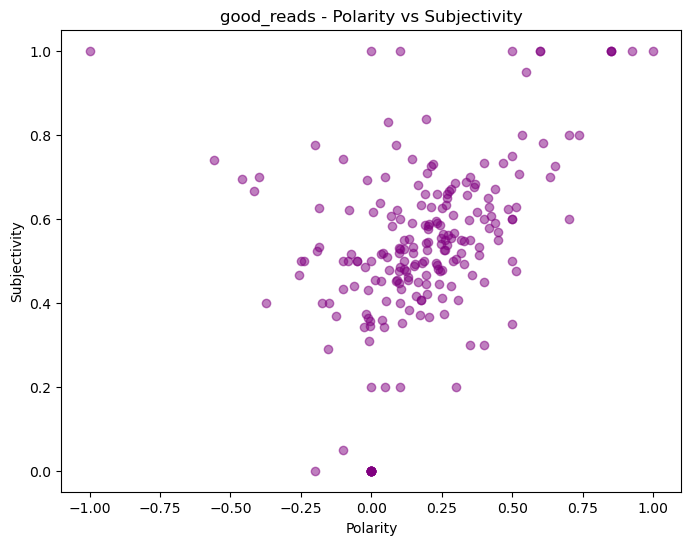

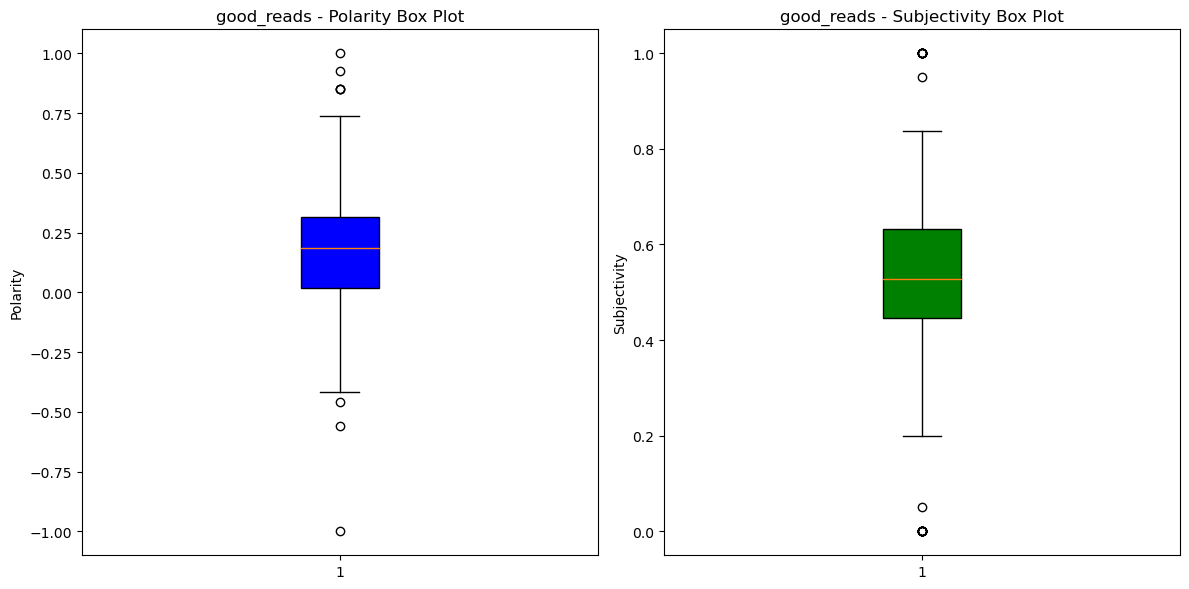

Plotting for sheet: Flipkart


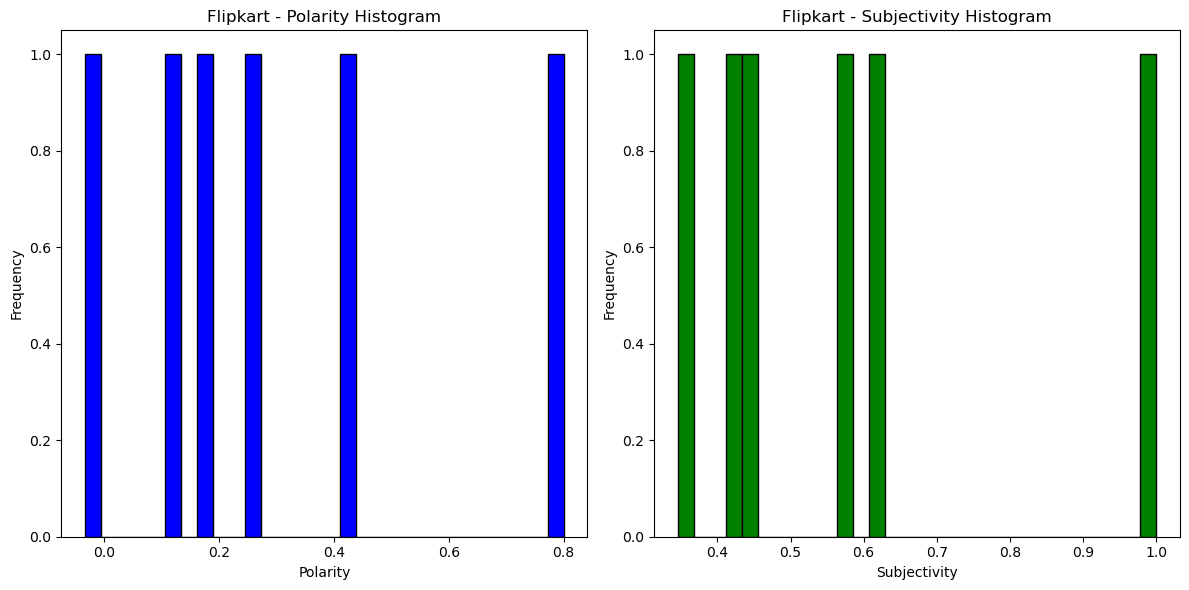

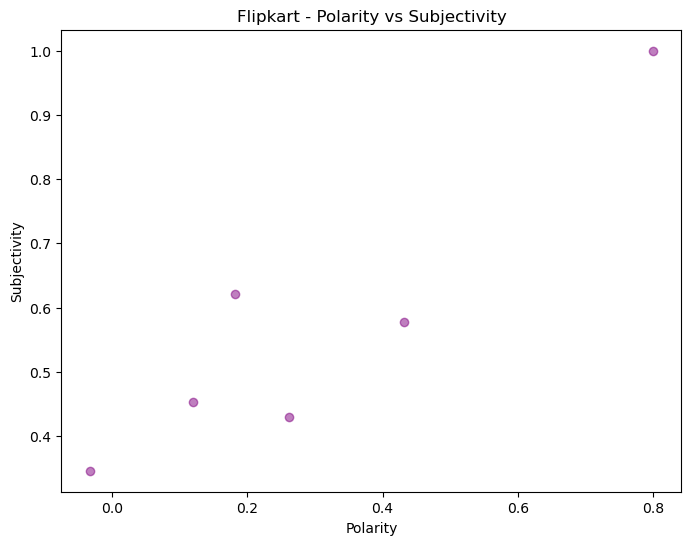

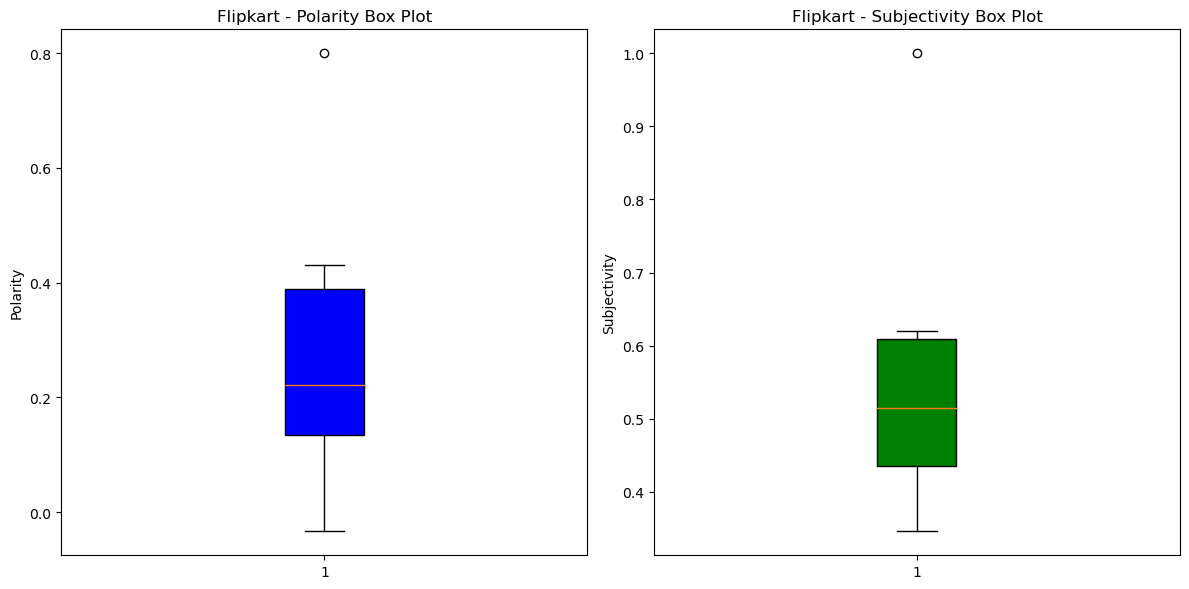

Plotting for sheet: Amazon.com


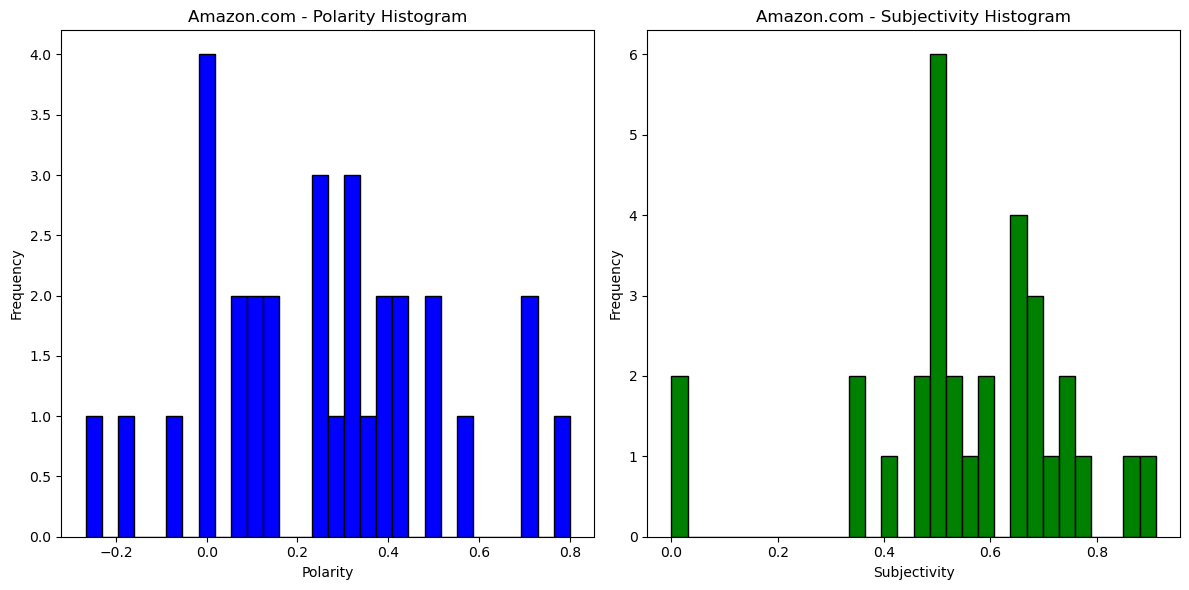

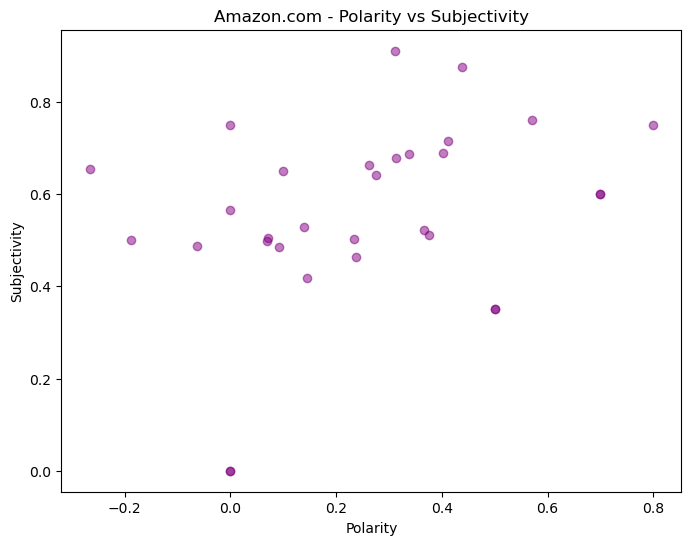

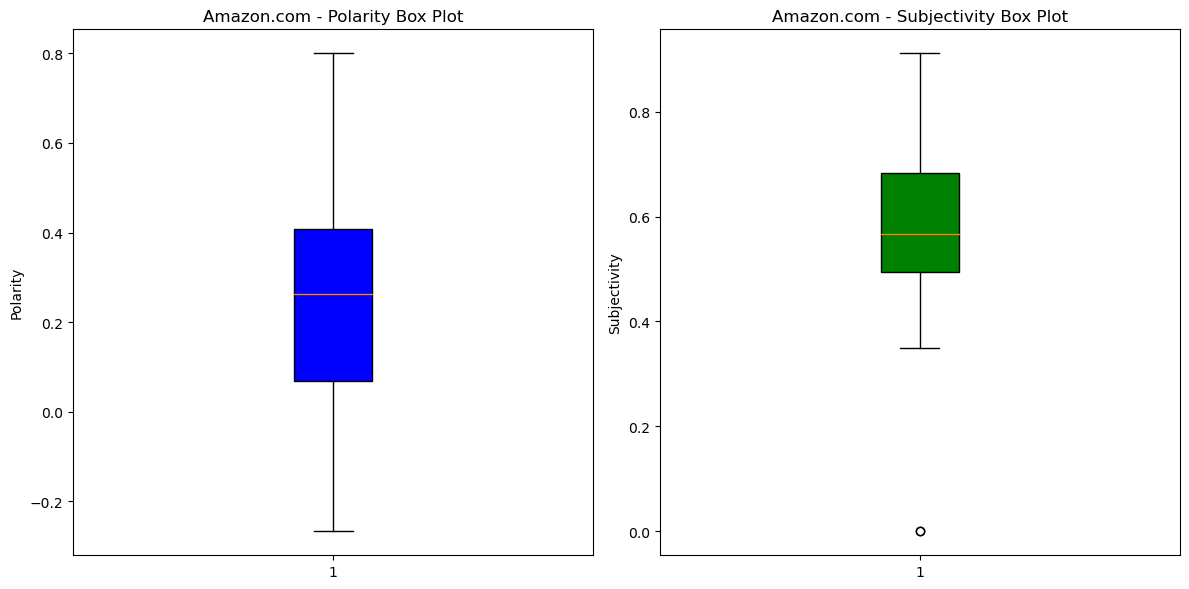

Plotting for sheet: Amazon.in


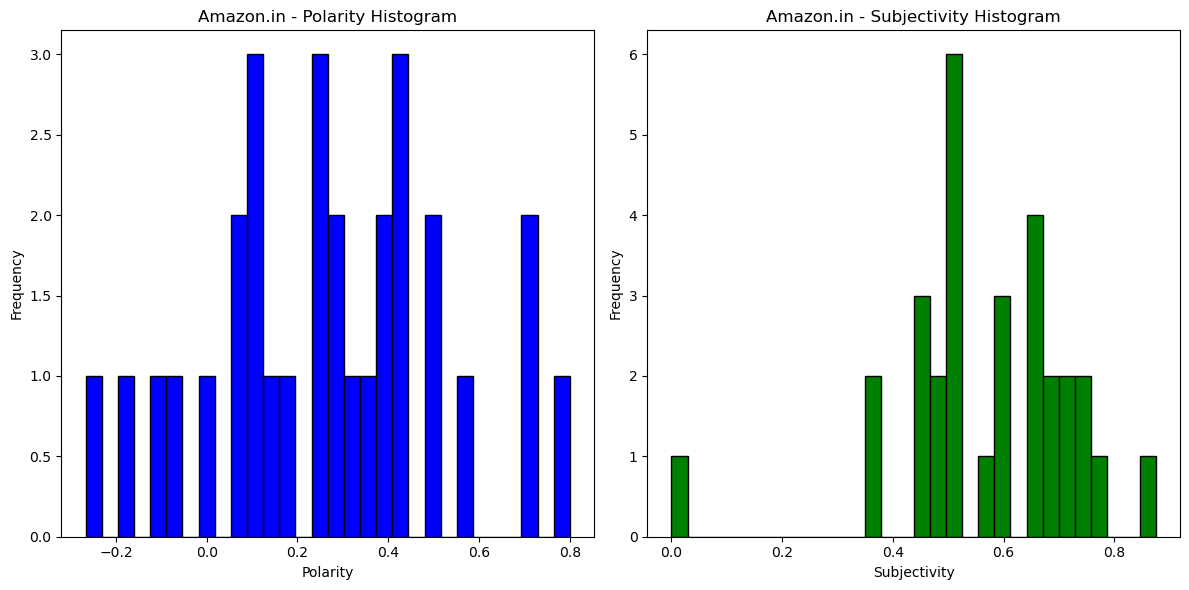

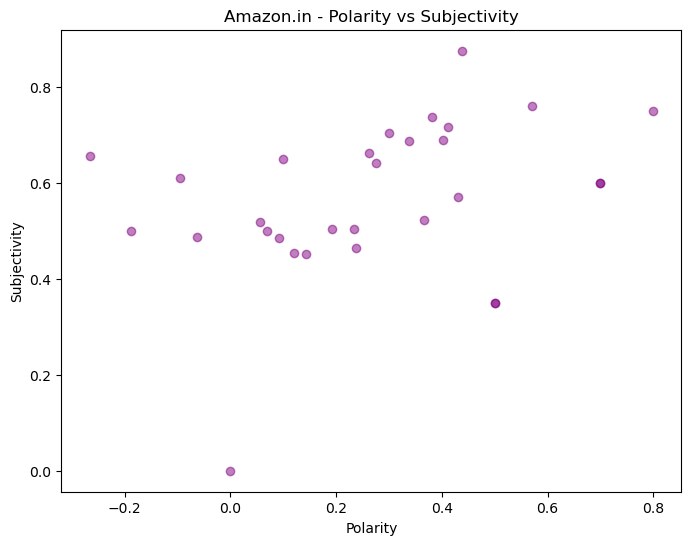

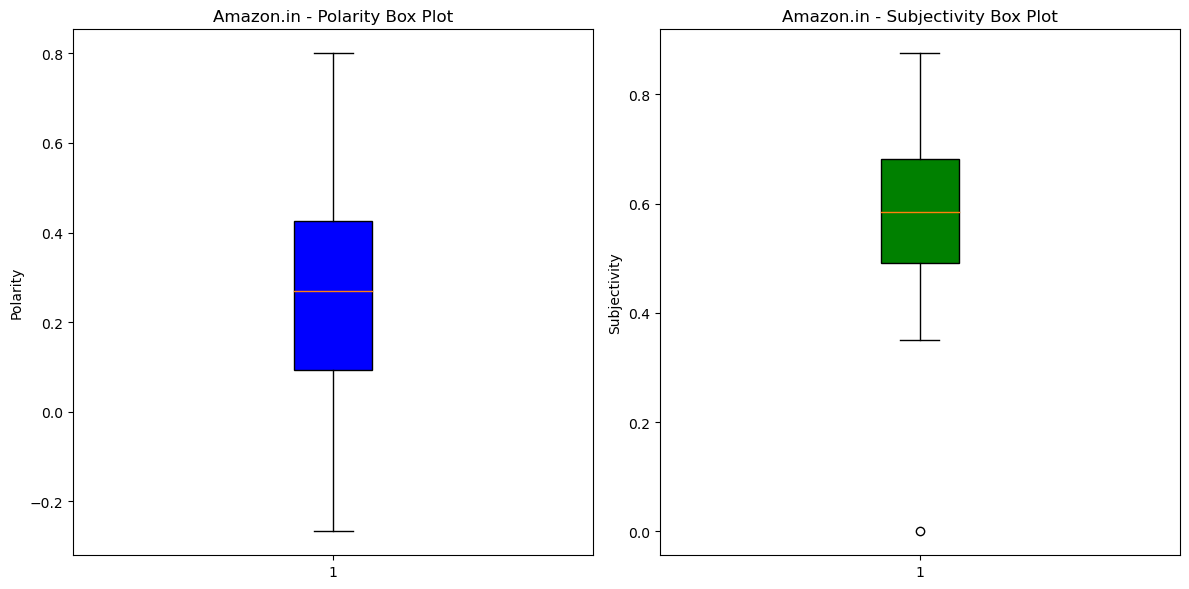

Plotting for sheet: the_story_graph


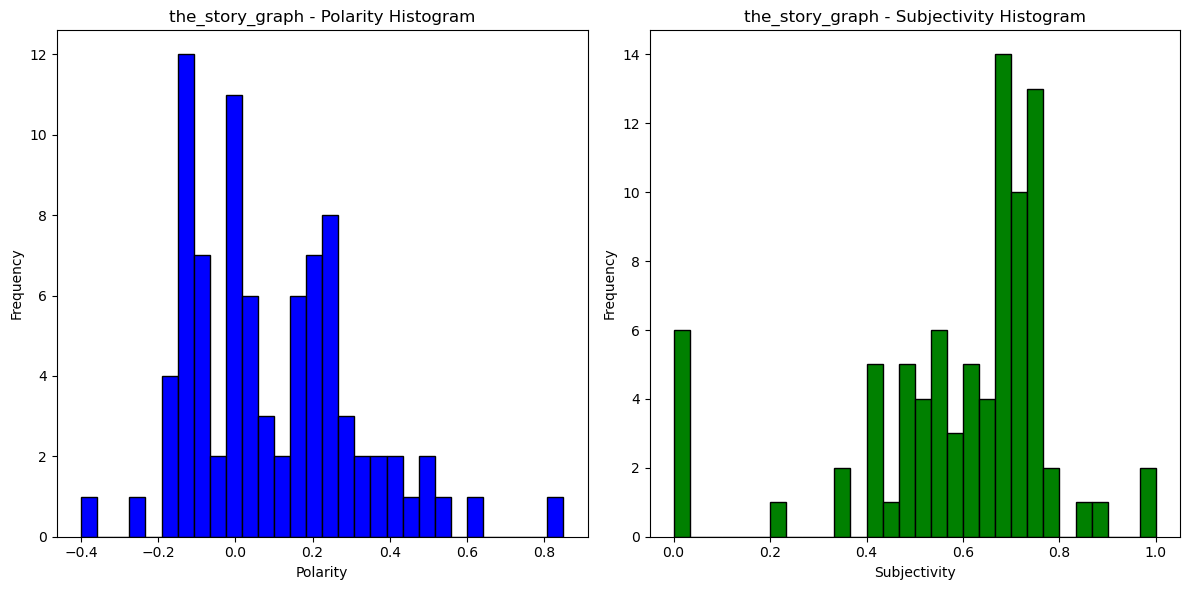

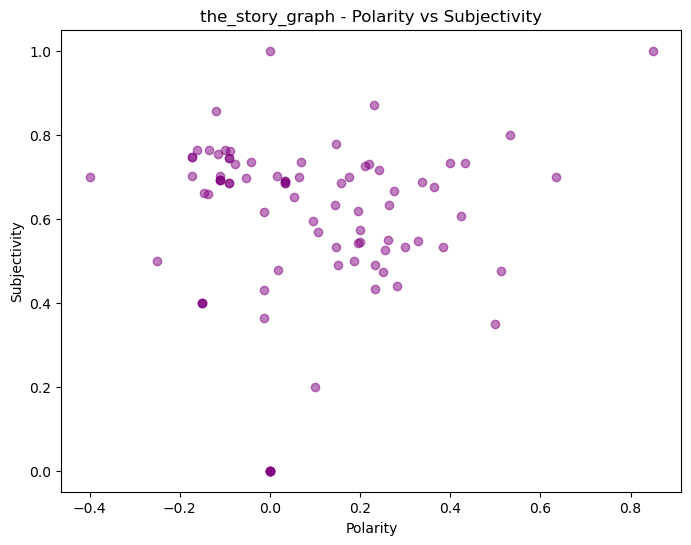

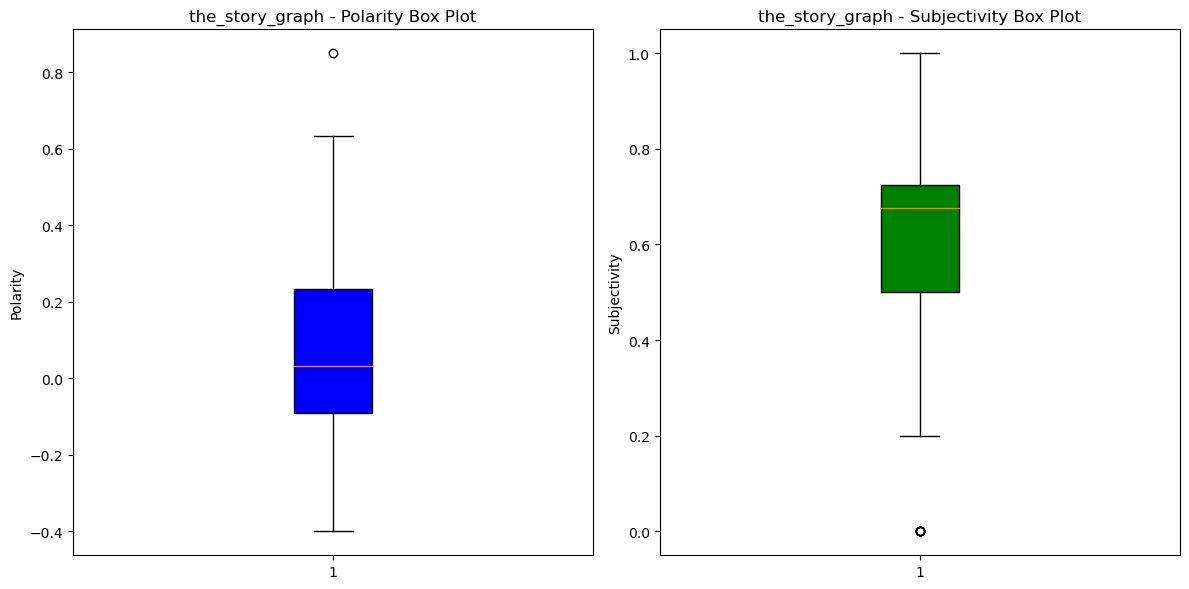

In [8]:
# Function to plot histograms for polarity and subjectivity
def plot_histograms(df, sheet_name):
    plt.figure(figsize=(12, 6))

    # Plot histogram for polarity
    plt.subplot(1, 2, 1)
    plt.hist(df['Polarity'], bins=30, color='blue', edgecolor='black')
    plt.title(f'{sheet_name} - Polarity Histogram')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')

    # Plot histogram for subjectivity
    plt.subplot(1, 2, 2)
    plt.hist(df['Subjectivity'], bins=30, color='green', edgecolor='black')
    plt.title(f'{sheet_name} - Subjectivity Histogram')
    plt.xlabel('Subjectivity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Function to plot bar plots for average polarity and subjectivity per sheet
def plot_bar_plots(data_frames):
    sheet_names = list(data_frames.keys())
    avg_polarity = [data_frames[sheet]['Polarity'].mean() for sheet in sheet_names]
    avg_subjectivity = [data_frames[sheet]['Subjectivity'].mean() for sheet in sheet_names]

    plt.figure(figsize=(12, 6))

    # Bar plot for average polarity
    plt.subplot(1, 2, 1)
    plt.bar(sheet_names, avg_polarity, color='blue')
    plt.title('Average Polarity per source of reviews')
    plt.xlabel('Review Source')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)

    # Bar plot for average subjectivity
    plt.subplot(1, 2, 2)
    plt.bar(sheet_names, avg_subjectivity, color='green')
    plt.title('Average Subjectivity per source of reviews')
    plt.xlabel('Review Source')
    plt.ylabel('Average Subjectivity')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Function to plot scatter plot for polarity vs subjectivity
def plot_scatter_plot(df, sheet_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Polarity'], df['Subjectivity'], alpha=0.5, color='purple')
    plt.title(f'{sheet_name} - Polarity vs Subjectivity')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()

# Function to plot box plots for polarity and subjectivity
def plot_box_plots(df, sheet_name):
    plt.figure(figsize=(12, 6))

    # Box plot for polarity
    plt.subplot(1, 2, 1)
    plt.boxplot(df['Polarity'], patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title(f'{sheet_name} - Polarity Box Plot')
    plt.ylabel('Polarity')

    # Box plot for subjectivity
    plt.subplot(1, 2, 2)
    plt.boxplot(df['Subjectivity'], patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title(f'{sheet_name} - Subjectivity Box Plot')
    plt.ylabel('Subjectivity')

    plt.tight_layout()
    plt.show()

# Plotting the graphs for each sheet
for sheet_name, df in data_frames.items():
    print(f'Plotting for sheet: {sheet_name}')
    plot_histograms(df, sheet_name)
    plot_scatter_plot(df, sheet_name)
    plot_box_plots(df, sheet_name)

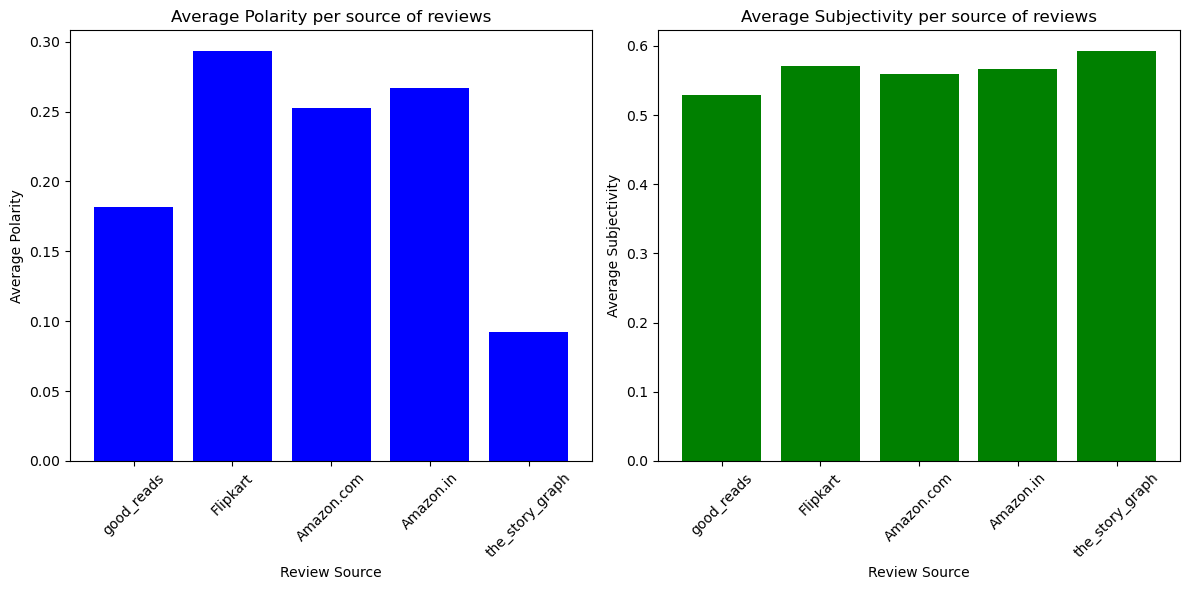

In [9]:
# Plot bar plots for average polarity and subjectivity across sheets
plot_bar_plots(data_frames)

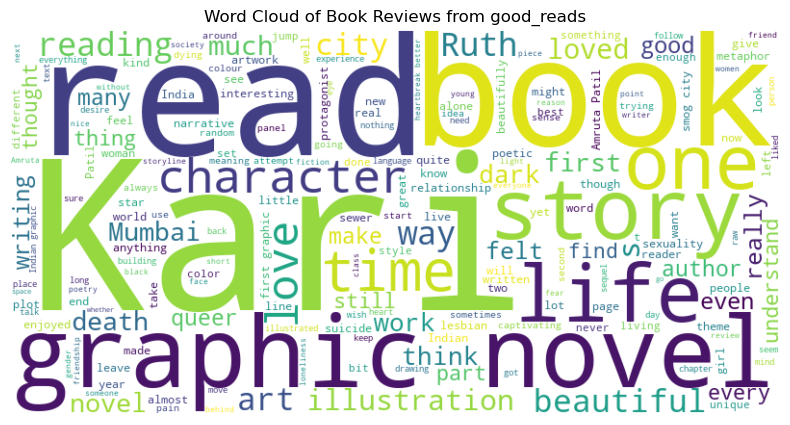

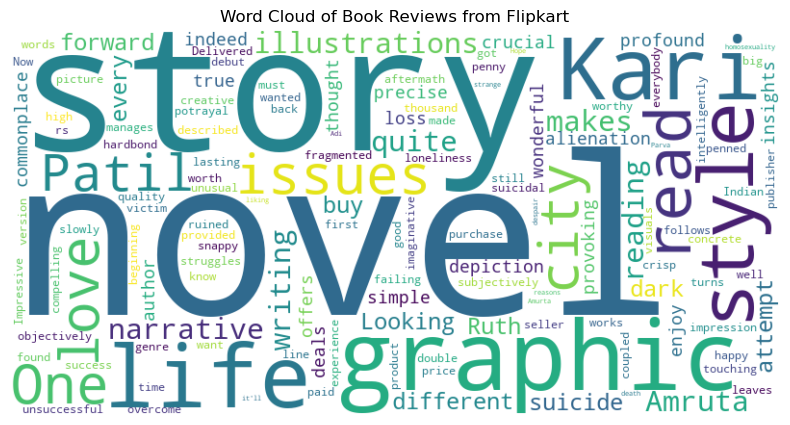

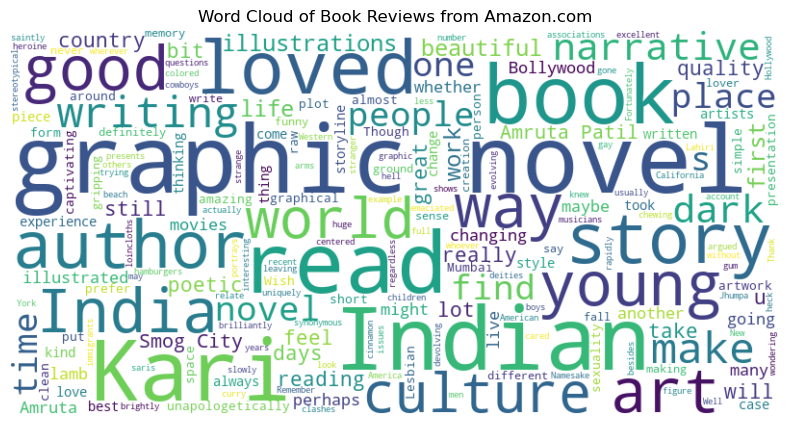

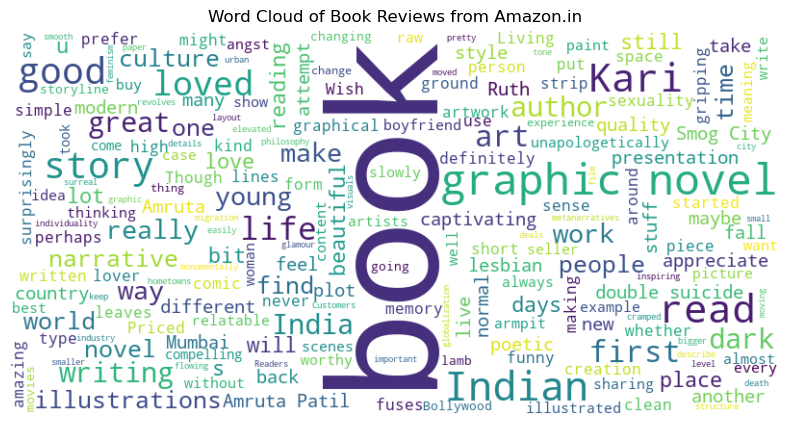

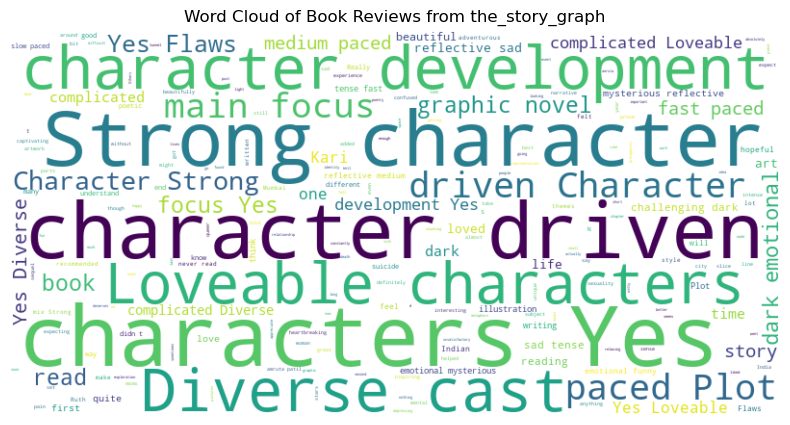

In [7]:
# Define the output file path
output_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Sentiment_Analysis.xlsx'

# Read data from each sheet into separate DataFrames
df_good_reads = pd.read_excel(output_file, sheet_name='good_reads', engine='openpyxl')
df_flipkart = pd.read_excel(output_file, sheet_name='Flipkart', engine='openpyxl')
df_amazon_com = pd.read_excel(output_file, sheet_name='Amazon.com', engine='openpyxl')
df_amazon_in = pd.read_excel(output_file, sheet_name='Amazon.in', engine='openpyxl')
df_the_story_graph = pd.read_excel(output_file, sheet_name='the_story_graph', engine='openpyxl')

# Function to generate and plot word cloud
def generate_wordcloud(df, title):
    # Combine all reviews into a single string
    text = ' '.join(review for review in df['Reviews'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot word clouds for each sheet
generate_wordcloud(df_good_reads, 'Word Cloud of Book Reviews from good_reads')
generate_wordcloud(df_flipkart, 'Word Cloud of Book Reviews from Flipkart')
generate_wordcloud(df_amazon_com, 'Word Cloud of Book Reviews from Amazon.com')
generate_wordcloud(df_amazon_in, 'Word Cloud of Book Reviews from Amazon.in')
generate_wordcloud(df_the_story_graph, 'Word Cloud of Book Reviews from the_story_graph')


In [14]:
# Load sentiment analysis results from multiple sheets
sheet_names = ['good_reads', 'Flipkart', 'Amazon.com', 'Amazon.in', 'the_story_graph']
dataframes = []

for sheet_name in sheet_names:
    df = pd.read_excel(output_file, sheet_name=sheet_name, engine='openpyxl')
    df['Source'] = sheet_name  # Add a column for the source name
    dataframes.append(df)

# Concatenate all dataframes into one
all_df = pd.concat(dataframes, ignore_index=True)

# Aggregate average sentiment scores by source
pivot_table = all_df.groupby('Source')[['Polarity', 'Subjectivity']].mean()


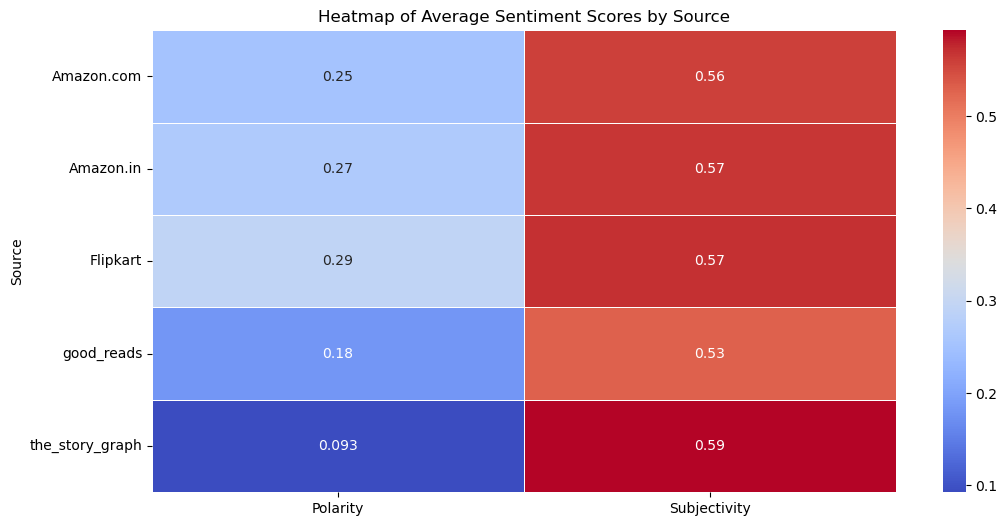

In [15]:
# Generate the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Average Sentiment Scores by Source')
plt.show()

In [16]:
# Path to the input Excel file
input_file = '/Users/navyakakandula/Desktop/Kari/Output Files/Book_Reviews.xlsx'
output_high_subjective_file = '/Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx'


# Read the Excel file using openpyxl engine
excel_data = pd.ExcelFile(input_file, engine='openpyxl')

# Initialize a list to store high subjective reviews
high_subjective_reviews = []

# Perform sentiment analysis on each sheet and filter high subjective reviews
for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(input_file, sheet_name=sheet_name, engine='openpyxl')
    
    # Ensure all entries in the 'Reviews' column are strings
    df['Reviews'] = df['Reviews'].astype(str)
    
    # Perform sentiment analysis
    df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    
    # Filter high subjective reviews
    high_subjective_df = df[df['Subjectivity'] > 0.8]
    high_subjective_reviews.append(high_subjective_df)

# Concatenate all high subjective reviews into one DataFrame
high_subjective_reviews_df = pd.concat(high_subjective_reviews, ignore_index=True)

# Save the high subjective reviews to a new sheet in the output Excel file
with pd.ExcelWriter(output_high_subjective_file, engine='openpyxl') as writer:
    high_subjective_reviews_df.to_excel(writer, sheet_name='High_Subjective_Reviews', index=False)

print(f"High subjective reviews filtered and saved to {output_high_subjective_file}")


High subjective reviews filtered and saved to /Users/navyakakandula/Desktop/Kari/Output Files/High_Subjective_Reviews.xlsx


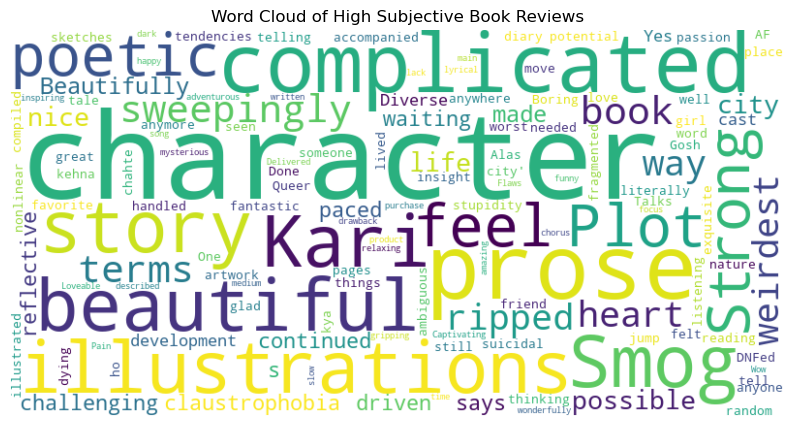

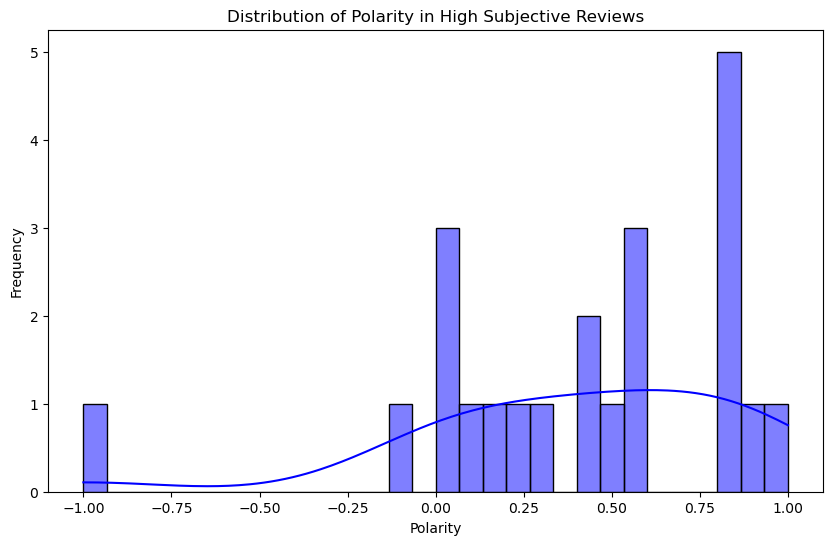

In [17]:
# Visualizations for high subjective reviews
# Combine all high subjective reviews into a single string for word cloud
text = ' '.join(review for review in high_subjective_reviews_df['Reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of High Subjective Book Reviews')
plt.show()

# Plot the distribution of polarity for high subjective reviews
plt.figure(figsize=(10, 6))
sns.histplot(high_subjective_reviews_df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Polarity in High Subjective Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
